# 1. SciPy 

O pacote scipy contém várias ferramentas dedicadas a problemas comuns em computação científica. Seus diferentes sub-módulos correspondem a diferentes aplicações, tais como interpolação, integração, otimização, processamento de imagens, estatísticas, funções especiais, etc

Os módulos do SciPy abordados são:

* File input/output: scipy.io
* Special functions: scipy.special
* Linear algebra operations: scipy.linalg
* Fast Fourier transforms: scipy.fftpack 
* Optimization and fit: scipy.optimize
* Statistics and random numbers: scipy.stats
* Interpolation: scipy.interpolate
* Numerical integration: scipy.integrate
* Signal processing: scipy.signal
* Image processing: scipy.ndimage

O SciPy é composto de submódulos para tarefas específicas como:

| submódulo | Objetivo |
| ---- | ---- |
| [scipy.cluster](http://docs.scipy.org/doc/scipy/reference/cluster.html#scipy.cluster) | 	Quantização de vetores (Kmean) |
| [scipy.constants](http://docs.scipy.org/doc/scipy/reference/constants.html#scipy.constants) | 	Constantes matemáticas e físicas |
| [scipy.fftpack](http://docs.scipy.org/doc/scipy/reference/fftpack.html#scipy.fftpack) | 	Tranformada de Fourier |
| [scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html#scipy.integrate) | 	Rotinas de Integração |
| [scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html#scipy.interpolate) | 	Interpolação |
| [scipy.io](http://docs.scipy.org/doc/scipy/reference/io.html#scipy.io) | 	Entrada e saída de dados |
| [scipy.linalg](http://docs.scipy.org/doc/scipy/reference/linalg.html#scipy.linalg) | 	Rotinas de algebra linear |
| [scipy.ndimage](http://docs.scipy.org/doc/scipy/reference/ndimage.html#scipy.ndimage) | 	pacote para imagens n-dimensionais |
| [scipy.odr](http://docs.scipy.org/doc/scipy/reference/odr.html#scipy.odr) | 	Regressão ortogonal de distância | 
| [scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html#scipy.optimize) | 	Otimização |
| [scipy.signal](http://docs.scipy.org/doc/scipy/reference/signal.html#scipy.signal) | 	Processamento de sinal |
| [scipy.sparse](http://docs.scipy.org/doc/scipy/reference/sparse.html#scipy.sparse) | 	Matrizes esparsas |
| [scipy.spatial](http://docs.scipy.org/doc/scipy/reference/spatial.html#scipy.spatial) | 	Estruturas de dados espacial e algoritmos |
| [scipy.special](http://docs.scipy.org/doc/scipy/reference/special.html#scipy.special) | 	Qualquer função matemática especial |
| [scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html#scipy.stats) | 	Estatística |


Todos dependem do numpy, mas são em grande parte independentes uns dos outros. A forma padrão de importar Numpy e estes módulos scipy é:

In [42]:
import numpy as np 
from scipy import stats # o mesmo para outros módulos

O principal namespace scipy contém principalmente funções que são realmente funções numpy (tente scipy.cos is np.cos). Esse são expostos apenas por razões históricas, geralmente não há razão para usar import scipy em seu código.

## 3.1 Entrada e saída de arquivos

Ler/Escrever arquivos:
* MatLab
* IDL
* Matrix Market
* Fortran
* NetCDF
* Wav
* Arf

Carregando e salvando arquivos em Matlab:

In [43]:
from scipy import io as spio
a = np.ones((3, 3))
spio.savemat('file.mat', {'a': a}) # savemat expects a dictionary
data = spio.loadmat('file.mat', struct_as_record=True)
data['a']

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

Lendo Imagens:

In [44]:
from scipy import misc
#misc.imread('fname.png')

# Matplotlib também possui uma função similar
import matplotlib.pyplot as plt
#plt.imread('fname.png')

## 3.2 Funções especiais

As funções especiais são funções transcendentais. O docstring do módulo ```scipy.special``` é bem escrito, por isso não vamos listar todas as funções aqui. Aquelas utilizadas com frequência são:

* Função Bessel, como ```scipy.special.jn()``` (função Bessel de n-ésima ordem)
* Funções elípticas (```scipy.special.ellipj()``` para a função elíptica Jacobiana, …)
* Função gama: ```scipy.special.gamma()```, veja também ```scipy.special.gammaln()``` que retorna o log da gama para uma alta precisão numérica.
* Erf, a área sobre uma curva Gaussiana: ```scipy.special.erf()```

In [45]:
from scipy import special
special.gamma.__doc__

"gamma(x, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])\n\ngamma(z)\n\nGamma function.\n\nThe Gamma function is defined as\n\n.. math::\n\n   \\Gamma(z) = \\int_0^\\infty t^{z-1} e^{-t} dt\n\nfor :math:`\\Re(z) > 0` and is extended to the rest of the complex\nplane by analytic continuation. See [dlmf]_ for more details.\n\nParameters\n----------\nz : array_like\n    Real or complex valued argument\n\nReturns\n-------\nscalar or ndarray\n    Values of the Gamma function\n\nNotes\n-----\nThe Gamma function is often referred to as the generalized\nfactorial since :math:`\\Gamma(n + 1) = n!` for natural numbers\n:math:`n`. More generally it satisfies the recurrence relation\n:math:`\\Gamma(z + 1) = z \\cdot \\Gamma(z)` for complex :math:`z`,\nwhich, combined with the fact that :math:`\\Gamma(1) = 1`, implies\nthe above identity for :math:`z = n`.\n\nReferences\n----------\n.. [dlmf] NIST Digital Library of Mathematical Functions\n 

## 3.3 Operações de Algebra Linear

O módulo ```scipy.linalg``` fornece operações de álgebra linear padrão, contando com uma implementação eficiente.

O ```scipy.linalg.det()``` calcula o determinante de uma matriz quadrada:

In [46]:
from scipy import linalg
arr = np.array([[1, 2],
                [3, 4]])
linalg.det(arr)

arr = np.array([[3, 2],
                [6, 4]])
linalg.det(arr)
#linalg.det(np.ones((3, 4))) #erro

0.0

Restrições envolvendo propriedades de matrizes são tratados como exceções. Quando tentamos computar o determinante de uma matriz que não é quadrada:

```python
linalg.det(np.ones((3,4)))
```

```python
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-24-c299b009337c> in <module>()
----> 1 linalg.det(np.ones((3,4)))

/usr/local/lib/python3.7/dist-packages/scipy/linalg/basic.py in det(a, overwrite_a, check_finite)
   1034     a1 = _asarray_validated(a, check_finite=check_finite)
   1035     if len(a1.shape) != 2 or a1.shape[0] != a1.shape[1]:
-> 1036         raise ValueError('expected square matrix')
   1037     overwrite_a = overwrite_a or _datacopied(a1, a)
   1038     fdet, = get_flinalg_funcs(('det',), (a1,))

ValueError: expected square matrix
```

A função ```scipy.linalg.inv()``` calcula a inversa de uma matriz:

In [47]:
A = np.array([[1,3,5],[2,5,1],[2,3,8]])
A

array([[1, 3, 5],
       [2, 5, 1],
       [2, 3, 8]])

In [48]:
linalg.inv(A) # inversa

array([[-1.48,  0.36,  0.88],
       [ 0.56,  0.08, -0.36],
       [ 0.16, -0.12,  0.04]])

In [49]:
A.dot(linalg.inv(A)) # produto interno da direta e inversa é a identidade

array([[ 1.00000000e+00, -1.11022302e-16,  4.85722573e-17],
       [ 3.05311332e-16,  1.00000000e+00,  7.63278329e-17],
       [ 2.22044605e-16, -1.11022302e-16,  1.00000000e+00]])

Se a matriz for singular (determinante igual a zero), a inversa vai resultar em um erro ```LinAlgError```:

```python
arr = np.array([[3, 2],
                [6, 4]])
linalg.inv(arr)
```

```python
---------------------------------------------------------------------------
LinAlgError                               Traceback (most recent call last)
<ipython-input-13-1406f813bef2> in <module>
      1 arr = np.array([[3, 2],
      2                 [6, 4]])
----> 3 linalg.inv(arr)

~/anaconda3/envs/root-python-env/lib/python3.9/site-packages/scipy/linalg/basic.py in inv(a, overwrite_a, check_finite)
    961         inv_a, info = getri(lu, piv, lwork=lwork, overwrite_lu=1)
    962     if info > 0:
--> 963         raise LinAlgError("singular matrix")
    964     if info < 0:
    965         raise ValueError('illegal value in %d-th argument of internal '

LinAlgError: singular matrix
```

Exemplo de Decomposição espectral:

In [50]:
A = np.array([[1, 2], [3, 4]])
la, v = linalg.eig(A) # decomposicao em autovalores e autovetores
l1, l2 = la
print(l1, l2) # autovalores
print(v[:, 0]) # primeiro autovetor
print(v[:, 1]) # segundo autovetor
print(np.sum(abs(v**2), axis=0)) # norma dos autovetores (unitarios)
v1 = np.array(v[:, 0]).T
print(linalg.norm(A.dot(v1) - l1*v1)) # verifica se Ax = lambda x

(-0.3722813232690143+0j) (5.372281323269014+0j)
[-0.82456484  0.56576746]
[-0.41597356 -0.90937671]
[1. 1.]
5.551115123125783e-17


## 3.4 Tranformada rápida de Fourier

O módulo ```scipy.fftpack``` permite calcular transformada rápida de Fourier. Como ilustração, um sinal de entrada (barulhento) pode parecer:

In [51]:
import numpy as np

time_step = 0.02
period = 5.
time_vec = np.arange(0, 20, time_step)
sig = np.sin(2 * np.pi / period * time_vec) + \
             0.5 * np.random.randn(time_vec.size)

O observador não sabe a frequência do sinal, apenas o passo do tempo de amostragem do sinal ```sig```. O sinal é suposto vindo de uma função real, de modo que a transformada de Fourier seja simétrica. A função ```scipy.fftpack.fftfreq()``` irá gerar as frequências de amostragem e ```scipy.fftpack.fft()``` irá calcular a transformada rápida de Fourier:

In [52]:
from scipy import fftpack
sample_freq = fftpack.fftfreq(sig.size, d=time_step)
sig_fft = fftpack.fft(sig)

Pelo fato de a energia resultante ser simétrica, apenas a parte positiva do espectro deve ser usada para encontrar a frequência:

In [53]:
pidxs = np.where(sample_freq > 0)
freqs = sample_freq[pidxs]
power = np.abs(sig_fft)[pidxs]

Para plotar com o Matplotlib:

[]

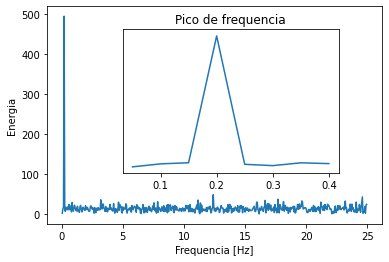

In [54]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(freqs, power)
plt.xlabel('Frequencia [Hz]')
plt.ylabel('Energia')
axes = plt.axes([0.3, 0.3, 0.5, 0.5])
plt.title('Pico de frequencia')
plt.plot(freqs[:8], power[:8])
plt.setp(axes, yticks=[])

A frequência do sinal pode ser encontrada com:

In [55]:
freq = freqs[power.argmax()]
np.allclose(freq, 1./period)  # checa se aquele frequência correta é encontrada

True

Agora, o ruído de alta frequência será removido a partir do sinal da transformada de Fourier:



In [56]:
sig_fft[np.abs(sample_freq) > freq] = 0


O sinal filtrado resultante pode ser calculado pela função ```scipy.fftpack.ifft()```:

In [57]:
main_sig = fftpack.ifft(sig_fft)

E o resultado pode ser visualizado com:

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Amplitude')

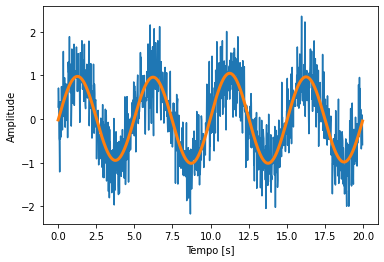

In [58]:
plt.figure()
plt.plot(time_vec, sig)
plt.plot(time_vec, main_sig, linewidth=3)
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')

O Numpy também tem uma implementação de FFT (```numpy.fft```). No entanto, em geral, deve ser preferido a do ```scipy```, uma vez que utiliza implementações mais eficientes.

## 3.5 Otimização e ajustes

Otimização é o problema de se encontrar uma solução numérica para a minimização ou a igualdade.
O módulo scipy.optimize fornece algoritmos úteis para a função de minimização (escalar ou multi-dimensional), ajuste de curva e descoberta de raizes.

In [59]:
from scipy import optimize

### Encontrando-se o mínimo de uma função escalar

Vamos definir a seguinte função:


In [60]:
def f(x):
    return x**2 + 10*np.sin(x)

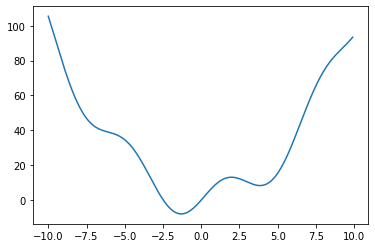

In [61]:
x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x)) 
plt.show()

Essa função tem um mínimo global em torno de -1,3 e um mínimo local em torno de 3,8.
A forma geral e eficiente para encontrar um mínimo para esta função é a condução de um gradiente descendente a partir de um determinado ponto inicial. O algoritmo BFGS é uma boa maneira de fazer isso:

In [62]:
optimize.fmin_bfgs(f, 0)

Optimization terminated successfully.
         Current function value: -7.945823
         Iterations: 5
         Function evaluations: 18
         Gradient evaluations: 6


array([-1.30644012])

Um possível problema com esta abordagem é que, se a função tem mínimos locais o algoritmo pode encontrar estes mínimos locais, em vez de o mínimo global, dependendo do ponto inicial:

In [63]:
optimize.fmin_bfgs(f, 3, disp=0)

array([3.83746709])

Se não sabemos a vizinhança do mínimo global para escolher o ponto inicial, é preciso recorrer a uma otimização global mais cara. Para determinar o mínimo global, o algoritmo mais simples é o algoritmo de força bruta, em que a função é avaliada em cada ponto de uma determinada rede:

In [64]:
grid = (-10, 10, 0.1)
xmin_global = optimize.brute(f, (grid,))
xmin_global

array([-1.30641113])

Para maiores tamanhos de grades, ```scipy.optimize.brute()``` torna-se bastante lento. 

```scipy.optimize.anneal()``` fornece uma alternativa, usando arrefecimento simulado (simulated annealing). Algoritmos mais eficientes para diferentes classes de problemas de otimização global existem, mas estão fora do escopo do scipy. Alguns pacotes úteis para a otimização global são OpenOpt, IPOPT, PyGMO e PyEvolve.

Para encontrar o mínimo local, vamos restringir a variável no intervalo (0, 10) usando ```scipy.optimize.fminbound()```:

In [65]:
xmin_local = optimize.fminbound(f, 0, 10)    
xmin_local

3.8374671194983834

### Encontrar as raízes de uma função escalar
Para encontrar uma raiz, ou seja, um ponto em que $f(x) = 0$, da função $f$ acima, podemos usar, por exemplo ```scipy.optimize.fsolve()```:

In [66]:
root = optimize.fsolve(f, 1)  # o chute inicial é 1
root

array([0.])

Note que apenas uma raiz é encontrada. Inspecionando o enredo, $f$ revela que há uma segunda raiz em torno de $-2,5$. Nós encontramos o valor exato do mesmo, ajustando a nossa suposição inicial:

In [67]:
root2 = optimize.fsolve(f, -2.5)
root2

array([-2.47948183])

### Ajustes de curvas
Suponha que tenhamos dados amostrados de $f(x)$ com algum ruído:

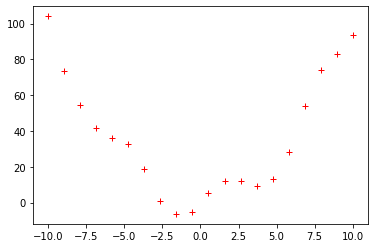

In [68]:
xdata = np.linspace(-10, 10, num=20)
ydata = f(xdata) + np.random.randn(xdata.size)

plt.plot(xdata, ydata, 'r+')

Agora, se nós sabemos a forma funcional da função a partir da qual as amostras foram retiradas ($x ^ 2 + sin (x)$, nesse caso), mas não as amplitudes dos termos, podemos encontrar aqueles por mínimos quadrados do ajuste de curva. Primeiro temos que definir a função para ajustar:

In [69]:
def f2(x, a, b):
    return a*x**2 + b*np.sin(x)

Então, podemos usar ```scipy.optimize.curve_fit()``` para encontrar $a$ e $b$:

In [70]:
guess = [2, 2]
params, params_covariance = optimize.curve_fit(f2, xdata, ydata, guess)
params

array([0.99428149, 9.76047816])

O resultado da função é $f(x) = x^2 + 9.8 sin(x)$.

Agora, encontramos os mínimos e raízes de $f$ e utilizamos o ajuste de curva nele, vamos colocar, então, todos essas resultados juntos em um único gráfico:

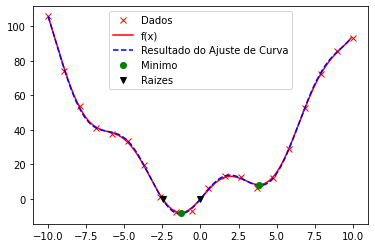

In [71]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

x = np.arange(-10, 10, 0.1)
def f(x):
    return x**2 + 10*np.sin(x)

grid = (-10, 10, 0.1)
xmin_global = optimize.brute(f, (grid,))
xmin_local = optimize.fminbound(f, 0, 10)
root = optimize.fsolve(f, 1)  # chute inicial é 1
root2 = optimize.fsolve(f, -2.5)

xdata = np.linspace(-10, 10, num=20)
np.random.seed(1234)
ydata = f(xdata) + np.random.randn(xdata.size)

def f2(x, a, b):
    return a*x**2 + b*np.sin(x)

guess = [2, 2]
params, params_covariance = optimize.curve_fit(f2, xdata, ydata, guess)

plt.plot(xdata, ydata, 'rx', label="Dados")
plt.plot(x, f(x), 'r-', label="f(x)")
plt.plot(x, f2(x, *params), 'b--', label="Resultado do Ajuste de Curva")

xmins = np.array([xmin_global[0], xmin_local])
plt.plot(xmins, f(xmins), 'go', label="Minimo")

roots = np.array([root, root2])
plt.plot(roots, f(roots), 'kv', label="Raizes")
plt.legend()

Outro exemplo: 

Primeiro, vamos gerar alguns dados:

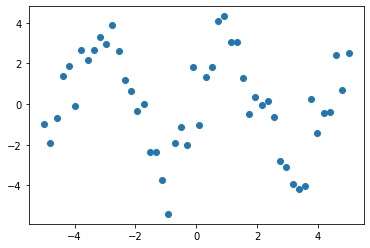

In [72]:
import numpy as np

# Semente para gerador de número randômico para garantir a reproducibilidade
np.random.seed(0)

x_data = np.linspace(-5, 5, num=50)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50) # acrescentando ruído

import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data)

Agora, vamos ajustar uma função seno aos dados:

In [73]:
def test_func(x, a, b):
    "função teste para ajustar"
    return a * np.sin(b * x)

# curve_fit aplica test_func a (x_data, y_data) com parâmetros iniciais [2,2]
params, params_covariance = optimize.curve_fit(test_func, x_data, y_data, p0=[2, 2])
print(params)

[3.05931973 1.45754553]


E vamos plotar a curva resultante nos dados:

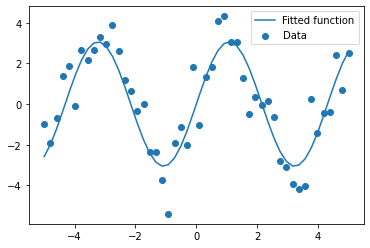

In [74]:
plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, test_func(x_data, params[0], params[1]),
         label='Fitted function')

plt.legend(loc='best')

plt.show()

## 3.6 Estatística e números randômicos

O módulo ```scipy.stats``` contém ferramentas estatísticas e descrições probabilísticas de processos aleatórios. 

Geradores de números aleatórios para vários processos aleatórios podem ser encontrados em ```numpy.random```.

### Histograma e função de densidade de probabilidade

Dadas as observações de um processo aleatório, seu histograma é um estimador de PDF do processo aleatório (função densidade de probabilidade):

In [75]:
a = np.random.normal(size=5000)
bins = np.arange(-4.0, 4.2, 0.2)

histogram = np.histogram(a, bins=bins, normed=True)[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  after removing the cwd from sys.path.


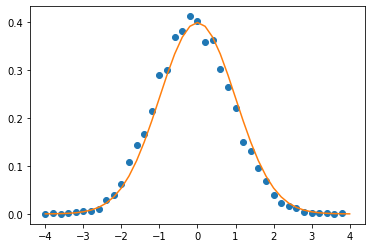

In [76]:
from scipy import stats
import matplotlib.pyplot as plt

b = stats.norm.pdf(bins)  # norm é uma districuição
plt.plot(bins[:-1], histogram, 'o')
plt.plot(bins, b, '-')
plt.show()

### *Fitting*

Uma atividade frequente em análise estatística é estimar os parâmetros de uma distribuição a partir de dados observados. Os métodos ```fit``` das várias distribuições encontradas em ```stats``` são capazes de realizar a estimação dos parâmetros por máxima verossimilhança (*maximum likelihood estimation* - MLE).

Vamos estimar os parâmetros do exemplo acima:

In [77]:
loc, std = stats.norm.fit(a)
print(loc)     
print(std)

-0.01702172544209058
0.9852513461399441


## Testes Estatísticos

Um teste estatístico é um indicador de decisão. 

O ```T-teste``` toma duas amostras independentes e verifica a hipótese de que a média das duas populações (assumindo a mesma variância) são iguais (hipótese nula - *null-hypothesis*).

O teste avalia se a média esperada difere significativamente entre as duas amostras. 

Implementado na rotina ```tttest_ind```, o teste também computa o **p-valor**. Se o valor do p-valor for menor que um limiar (por exemplo, 1%), rejeita-se a hipótese de médias iguais.

Considere como exemplo duas amostra: $a$ produzida a partir de uma distribuição normal $N(0,1)$ e $b$, a partir de uma distribuição normal $N(1,1)$. Note que as duas distribuições têm a mesma variância, mas diferem em relação à média.
Podemos usar uma T-teste para decidir se os dois conjuntos de observações são significativamente diferentes:

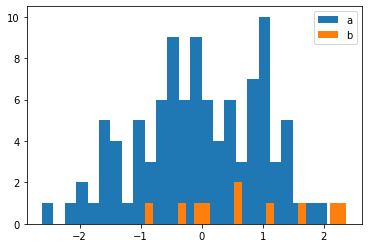

In [78]:
a = np.random.normal(0, 1, size=100)
b = np.random.normal(1, 1, size=10)

n, pan, binstches = plt.hist(a, 25, label='a')
n, pan, binstches = plt.hist(b, 25, label='b')
plt.legend()


Como esperado, $a$ e $b$ diferem segundo o teste (note o baixo p-valor):

In [79]:
stats.ttest_ind(a, b)

Ttest_indResult(statistic=-2.36752415608801, pvalue=0.0196871113676269)

A saída resultante é composta por:

* O valor estatístico T: é um número do sinal que é proporcional à diferença entre os dois processos aleatórios e a magnitude está relacionada com o significado dessa diferença.
* O valor de p: probabilidade de ambos os processos são idênticas. Se for próximo de 1, os dois processos são quase certamente idênticos. O mais próximo de zero, o mais provável é que os processos tenham diferentes significados.

## 3.7 Interpolação

O ```scipy.interpolate``` é útil para a montagem de uma função a partir de dados experimentais e, portanto, avaliar os pontos onde não existe nenhuma medida. O módulo é baseado nas subrotinas Fortran ```FitPack``` do projecto netlib.

Ao imaginar dados experimentais perto de uma função seno:

In [80]:
from scipy import interpolate

x = np.linspace(0, 10, num=11, endpoint=True) # variaveis a serem interpoladas
y = np.cos(-x**2/9.0) # x e y
f = interpolate.interp1d(x, y) # f tem coef. do polinomio da interpolacão linear
f2 = interpolate.interp1d(x, y, kind='cubic') # f2 tem coef. do polinomio da interpola¸c~ao cubica

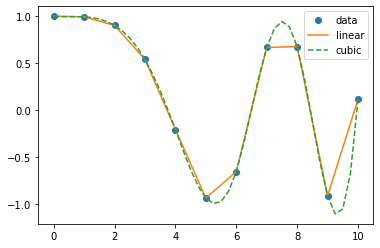

In [81]:
xnew = np.linspace(0, 10, num=41, endpoint=True) # novas posicoes onde realizar a interpola¸c~ao
plt.plot(x, y, 'o') # pontos originais
plt.plot( xnew, f(xnew), '-') # pontos interpolados linearmente
plt.plot( xnew, f2(xnew), '--') # pontos interpolados cubicamente
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

```scipy.interpolate.interp2d``` é semelhante ao ```scipy.interpolate.interp1d```, mas para matrizes de 2-D. 

Note que para a família interp, o tempo computado deve ficar dentro do intervalo de tempo medido.

## 3.8 Integração Numérica

Rotinas para integração de funções
* quad – rotinas de propósito geral.
* dblquad – rotinas de integração dupla.
* tplquad – rotinas de integração tripla.
* fixed quad – Integra f(x) com quadratura Gaussiana de ordem n.
* quadrature – Integra f(x) com quadratura Gaussiana de ordem n com dada
tolerância
* romberg – Integra f(x) usando integração de Romberg

Met´odos de integração a partir de pontos
* trapz – método trapezoidal pra calcular integral de amostras
* cumtrapz – método trapezoidal cumulativo pra calcular integral de amostras
* simps – método Simpson pra calcular integral de amostras
* romb – método Romberg pra calcular integral de amostras (2**k + 1)
igualmente espaçadas.

Integração de Equações Diferenciais Ordinárias (ODE)
* odeint – integração geral
* ode – integração com otinas VODE e ZVODE


Exemplo: Calcular $\int_0^4 x^2 dx = \frac{4^3}{3}$ e compara com o valor numérico

In [82]:
from scipy import integrate
x2 = lambda x: x**2
integrate.quad(x2, 0, 4)

(21.333333333333336, 2.368475785867001e-13)

In [83]:
print(4**3 / 3.) # analytical result

21.333333333333332


Exemplo: Integrando uma ODE simples

Vamos resolver a ODE $\frac{dy}{dt} = -2y$ no intervalo $[0, 4]$ com a condição inicial $y (t=0) = 1$.

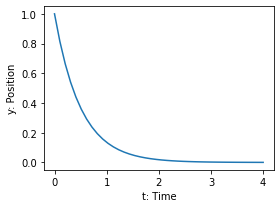

In [84]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt

def calc_derivative(ypos, time):
    return -2*ypos

time_vec = np.linspace(0, 4, 40)
yvec = odeint(calc_derivative, 1, time_vec)

plt.figure(figsize=(4, 3))
plt.plot(time_vec, yvec)
plt.xlabel('t: Time')
plt.ylabel('y: Position')
plt.tight_layout()

# Referências 

* scipy-lectures.org

* https://www.ferrari.pro.br/home/documents/FFerrari-ecosistema-python.pdf

* http://www.estruturas.ufpr.br/disciplinas/pos-graduacao/introducao-a-computacao-cientifica-com-python/introducao-python/4-9-processamento-de-sinais/

* https://ainfo.cnptia.embrapa.br/digital/bitstream/item/121412/1/Doc131.pdf